# Chapter 2: Roundoff Errors

In [4]:
using PyPlot

# Example 2.2 -- Figure 2.2

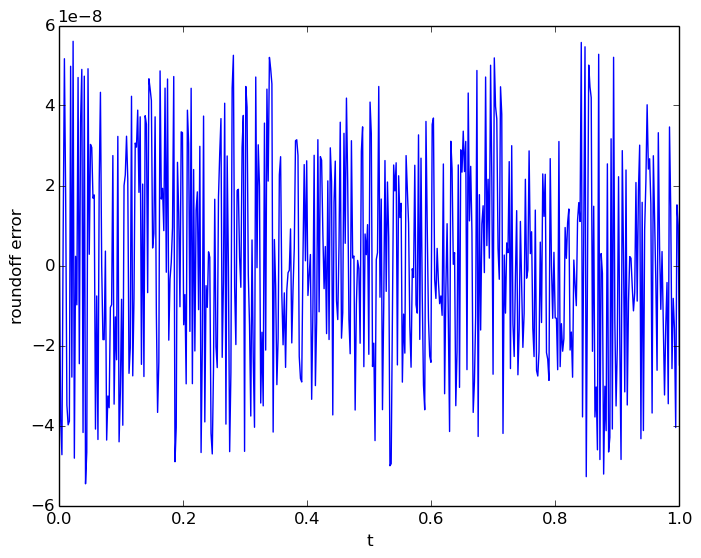

rel_round_err 0.940338


In [5]:
t = linspace(0,1,500)
round_err = []
for val in t
    ttval = exp(-val) * (sin(2*pi*val)+2)
    rtval = Float32(ttval)
    err = (ttval - rtval)/ttval
    push!(round_err,err)
end
plot(t,round_err,"b-")
xlabel("t")
ylabel("roundoff error")

#relative error should be about eta eps(Float32)/2
rel_round_err = maxabs(round_err)/(eps(Float32)/2)
@printf "rel_round_err %f\n" rel_round_err

# Example 2.8 -- Figure 2.3

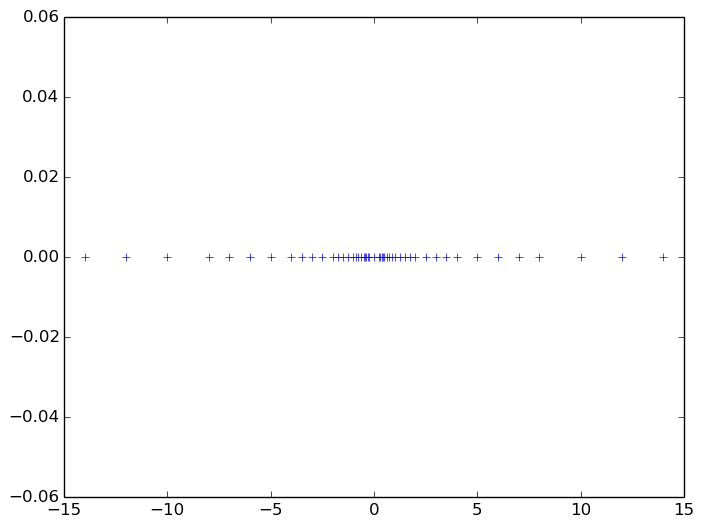

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9423af3d90>

In [12]:
x = Float64[]

#Generate all positive numbers of the system (2,3,-2,3)
for i = 1:0.25:1.75
    for j = -2:3
        push!(x,i*(2.0^j))
    end
end

xcopy = copy(x)
for val in xcopy  #add all negative numbers
    push!(x,-val)
end

push!(x,0) #add 0
sort!(x)
y = zeros(x)
plot(x,y,"+")

Below is a function that returns values in x rounded to n decimal digits. n is less than the number of significant digits in x

In [78]:
function roundc(x,n)
    #initialize fractions, exponents
    f = zeros(x)
    e = copy(f)
    #find nonzero components of x
    nz = find(x)
    xx = abs(x[nz])
    #decimal exponent of nonzero x
    e[nz] = ceil(log10(xx))
    #fraction of nonzero x
    f[nz] = xx ./ 10.^e[nz] 
    
    s = 1
    frac = zeros(x)
    for j = 1:n
        s = s*10
        d = floor(f*s + 0.5)  #extract digit
        f = f - d/s
        frac = frac + d/s    #add digit to rounded fraction
    end
    y = sign(x) .* (frac .* 10.^e);
    
    return y
end

x = [0.7342,0.7346]
y = roundc(x,3)
@printf "[%f %f]\n" y[1] y[2]


[0.734000 0.735000]
